Problem Statement:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 


In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df = pd.read_csv(r"C:\Users\Abhijeet\Desktop\My Data\Databases\dataset1-master\titanic_train.csv")
# Importing the dataset

In [3]:
df.head(5)

# Checking dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.sample(10) 
# Checking random samples

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
648,649,0,3,"Willey, Mr. Edward",male,NaN,0,0,S.O./P.P. 751,7.5500,NaN,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
720,721,1,2,"Harper, Miss. Annie Jessie ""Nina""",female,6.0,0,1,248727,33.0000,NaN,S
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.1250,NaN,Q
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
746,747,0,3,"Abbott, Mr. Rossmore Edward",male,16.0,1,1,C.A. 2673,20.2500,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S


In [6]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can clearly see Nans present in the Age column and Cabin Column

In [7]:
df.shape

# Checking number of rows and columns

(891, 12)

Here we have 12 columns descripted as below - 

*Passengerid - Datatype=integer - ID number for Passenger ranging from 1 to 890

*Survived -Datatype=integer- This is  out target column 

*Pclass -Datatype=integer- Class in which passenger is travelling

*Name - Datatype=Object - Name of Passenger

*Sex - Datatype=Object - Sex(Male/Female)

*Age  -Datatype=Float -  Age in years

*SibSp -Datatype=integer-  Wheter passenger has Sibiling or spouse

*Parch - Datatype=integer-Parents or Childers of passnger

*Ticket - Datatype=Object -Ticket ID

*Fare -Datatype=Float -  Fare in USD


*Cabin -  Datatype=Object - Cabin NO

*Embarked - Datatype=Object -  Post from which passenger is Embarked

In [8]:
df.describe()
# Cheking How data is spread

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Here we can see that Total 38 % passengers survived the Titanic accident. 

Also there avg age is 30 , Our age column has some missing values
Min age of survived passnger is 0.42 years and maximum age of survived passenger is 80 years
Avg 52 % of Passengers were having Siblings/Spouces outside the Titanic

Our Fare column has 0 min it means it has missing ir incorrect values

We have many missing values in our Age column



In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* We can see 177 missing values in Age column and 687 in case of cabin where we have to deal with it.
 
* Age values can be filled but Cabin values has more missing data filling those may imbalnce our model so we should drop that column

* Embarked has only 2 missing values 

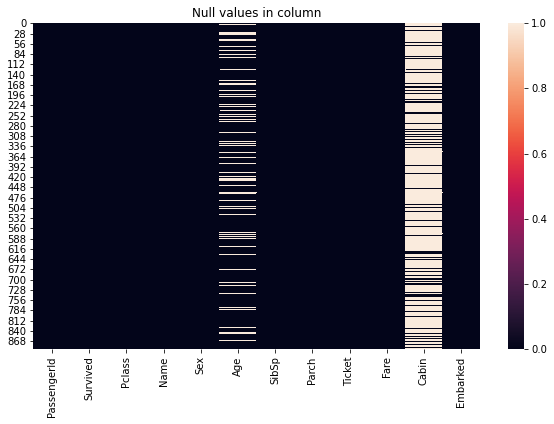

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())
plt.title("Null values in column")
plt.show()
# Visual Representaion of missing values in cabin and Age column

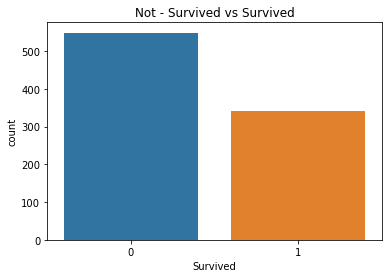

In [11]:
# plotting graph of survived
sns.countplot(df['Survived'])
plt.title('Not - Survived vs Survived')
plt.show()

In [12]:
df['Survived'].value_counts()

# We can see 549 passengers didnt survived whereas only 342 Passengers Survived

0    549
1    342
Name: Survived, dtype: int64

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Plotting graphs for Features vs Target Variable

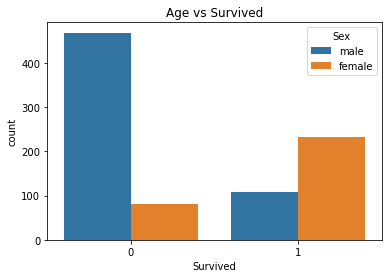

In [14]:
sns.countplot(x='Survived',hue='Sex',data=df)
plt.title('Age vs Survived')
plt.show()

Here we can see that Survival rate is higher from the female where has Male has higher non-survival rate

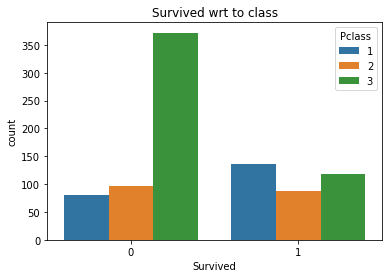

In [15]:
sns.countplot(x='Survived',hue='Pclass',data=df)
plt.title('Survived wrt to class')
plt.show()

We can clearly see that Survivals rate is higher in Passenger class 1 bering the premium class 

Class 2 has moderate no of Survivals it is somehow balanced in terms of count.

Class 3 has least no of survivers , being the least lesser premium class than other two

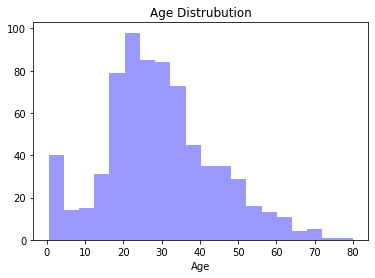

In [16]:
sns.distplot(df['Age'].dropna(),kde=False,color='blue')
plt.title('Age Distrubution')
plt.show()

We can see We have more number or passngers from age 15 to 45

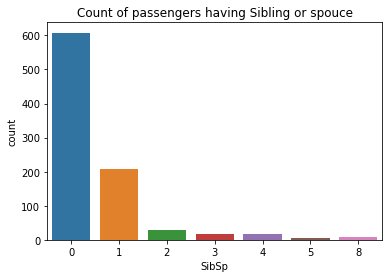

In [17]:
sns.countplot(x='SibSp',data=df)
plt.title('Count of passengers having Sibling or spouce')
plt.show()

We can see here around 600 passengers were not having any sibling or spouce onboard , whreas 200 passengers were having only oone sibling or spouce further the count decreases for more siblings or spouce/


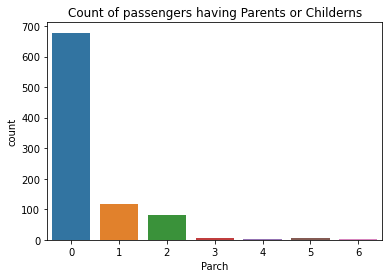

In [18]:
sns.countplot(x='Parch',data=df)
plt.title('Count of passengers having Parents or Childerns')
plt.show()

It is clear that around 675 passengers were not having parents/childrens onboard whreas number is around 110 for the 1 parent/children and around 80 for 2 parent/children

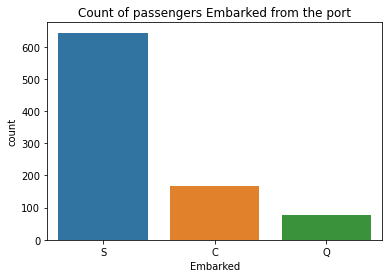

In [19]:
sns.countplot(x='Embarked',data=df)
plt.title('Count of passengers Embarked from the port')
plt.show()

We can see that more number of passengers were Embarked from port S

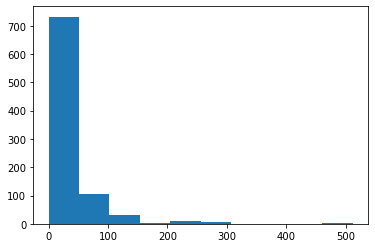

In [35]:
plt.hist(x="Fare",data=df,)
plt.show()

We can see that Fares are high in the range 0 to 150 

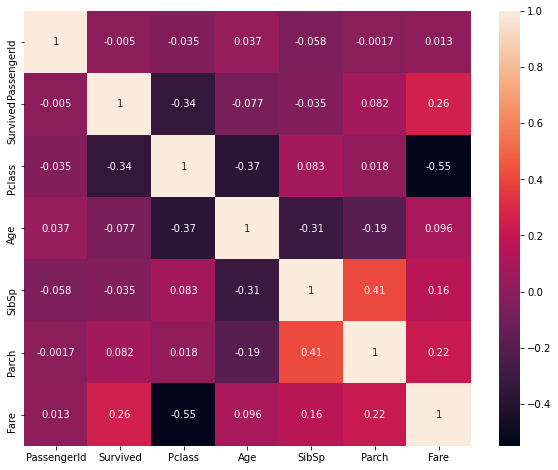

In [3]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Here can see the stringest relation is negative correlatin between Pclass and fare but its not too much so we are not going to drop any of column for corrlation

Now we need to fill Nans present in our dataset. As Cabin has more than 60 % of Nan we will drop that column. We can fill Nan present in Age and Embarked

In [4]:
# Filling NAns present in the Age column by the mean.

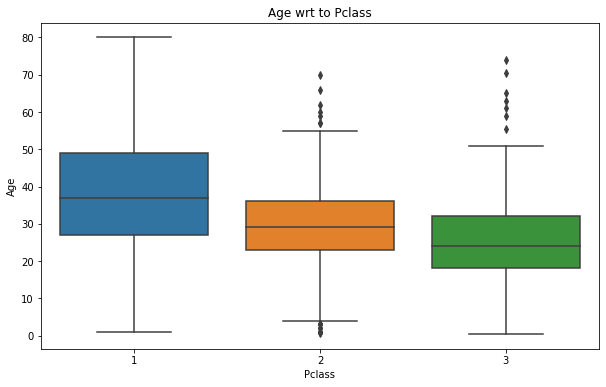

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Pclass',y='Age',data=df)
plt.title('Age wrt to Pclass')
plt.show()

In [11]:
# We are plotting age distrubution wrt to Pclass so we can fill Nans with respect to mean of respective class

# We can take 38, 28 and 23 as respective ages for Pclass 1 , 2 and 3


In [12]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1 :
            return(32)
        
        if Pclass == 2 :
            return(28)
        if Pclass == 3:
            return(23)
        
        
    else:
        return Age
    

    

In [13]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

# We have fillaed the ages column with means of respective Pclass.  

Our Embarked column has only 2 Nans so filling it with most commen value

In [15]:

df['Embarked'].describe()

# We can see S is port where most passengers were Embarked

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
df['Embarked']=df['Embarked'].fillna('S')

In [21]:
# Checking for Nans after filling

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Our cabin column has 77 % of numm values filling them may imbalnce entine dataset so dropping column Cabin

In [24]:
df.drop('Cabin',axis = 1, inplace=True)

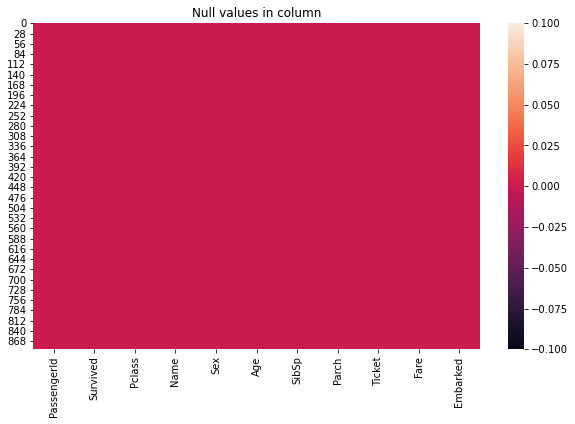

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),color='Red')
plt.title("Null values in column")
plt.show()

In [ ]:
# Now we can see no null values in dataset 

In [32]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [26]:
df.shape

(891, 11)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Here we can see Name, Sex, Ticket and Embarked are having Object datatype.

Among them Name and ticket columns can be dropped as they doesnt have any relatinship with the target variable.

We need to convert Sex and Embarked column into integers to train our model

In [34]:
# Using LabelEncoder to Encode the Embarked and Sex column

from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()

df['Embarked']=le.fit_transform(df['Embarked'])

In [35]:
df['Sex']=le.fit_transform(df['Sex'])

In [40]:
print (df['Embarked'].sample(5),'-----------' ,df['Sex'].sample(5))

701    2
621    2
262    2
628    2
249    2
Name: Embarked, dtype: int32 ----------- 783    1
547    1
444    1
552    1
691    0
Name: Sex, dtype: int32


Here we can see Embarked and Sex Columns are converted into integers

In [41]:
#Let's have a look at our dataset again

df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
617,618,0,3,"Lobb, Mrs. William Arthur (Cordelia K Stanlick)",0,26.0,1,0,A/5. 3336,16.1000,2
280,281,0,3,"Duane, Mr. Frank",1,65.0,0,0,336439,7.7500,1
475,476,0,1,"Clifford, Mr. George Quincy",1,32.0,0,0,110465,52.0000,2
830,831,1,3,"Yasbeck, Mrs. Antoni (Selini Alexander)",0,15.0,1,0,2659,14.4542,0
82,83,1,3,"McDermott, Miss. Brigdet Delia",0,23.0,0,0,330932,7.7875,1


In [44]:
df.drop(df[['PassengerId','Name','Ticket']],axis = 1, inplace=True)

In [46]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
245,0,1,1,44.0,2,0,90.000,1
554,1,3,0,22.0,0,0,7.775,2
600,1,2,0,24.0,2,1,27.000,2
250,0,3,1,23.0,0,0,7.250,2
196,0,3,1,23.0,0,0,7.750,1


In [47]:
# Dividing dataset into features and Taget
x = df.drop('Survived',axis=1)
y = df['Survived']

In [49]:
# Features
x.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [50]:
# Target or Label

y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [51]:
# Splitting data into for training and Testing

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 455)

In [52]:
# Model Bulding 

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


lr = LogisticRegression()

lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)


print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))



Accuracy= 84.30493273542601
Confusion Matrix [[126  12]
 [ 23  62]]
Classification Report               precision    recall  f1-score   support

           0       0.85      0.91      0.88       138
           1       0.84      0.73      0.78        85

    accuracy                           0.84       223
   macro avg       0.84      0.82      0.83       223
weighted avg       0.84      0.84      0.84       223



In [60]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))




Accuracy= 65.91928251121077
Confusion Matrix [[125  13]
 [ 63  22]]
Classification Report               precision    recall  f1-score   support

           0       0.66      0.91      0.77       138
           1       0.63      0.26      0.37        85

    accuracy                           0.66       223
   macro avg       0.65      0.58      0.57       223
weighted avg       0.65      0.66      0.61       223



In [65]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))


Accuracy= 75.33632286995515
Confusion Matrix/n [[107  31]
 [ 24  61]]
Classification Report               precision    recall  f1-score   support

           0       0.82      0.78      0.80       138
           1       0.66      0.72      0.69        85

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.76      0.75      0.76       223



In [72]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

y_pred = sgd.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 61.88340807174888
Confusion Matrix [[138   0]
 [ 85   0]]
Classification Report               precision    recall  f1-score   support

           0       0.62      1.00      0.76       138
           1       0.00      0.00      0.00        85

    accuracy                           0.62       223
   macro avg       0.31      0.50      0.38       223
weighted avg       0.38      0.62      0.47       223



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))


Accuracy= 82.51121076233184
Confusion Matrix [[124  14]
 [ 25  60]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.90      0.86       138
           1       0.81      0.71      0.75        85

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.82      0.83      0.82       223



In [74]:
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)

y_pred = gbk.predict(x_test)

print ('Accuracy=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy= 85.20179372197309
Confusion Matrix [[130   8]
 [ 25  60]]
Classification Report               precision    recall  f1-score   support

           0       0.84      0.94      0.89       138
           1       0.88      0.71      0.78        85

    accuracy                           0.85       223
   macro avg       0.86      0.82      0.84       223
weighted avg       0.86      0.85      0.85       223



Among all of the models GradientBoostingClassifier is giving highest accuracy so we are going to tune parametrs for that model

In [75]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8],
             }

In [88]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train,y_train)

GCV.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 284, in _check_params
    raise ValueError("Invalid value for max_features: %r. "
ValueError: Invalid value for max_features: 'log'. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fai

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 284, in _check_params
    raise ValueError("Invalid value for max_features: %r. "
ValueError: Invalid value for max_features: 'log'. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fai

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 284, in _check_params
    raise ValueError("Invalid value for max_features: %r. "
ValueError: Invalid value for max_features: 'log'. Allowed string values are 'auto', 'sqrt' or 'log2'.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit fai

{'max_depth': 5, 'max_features': 'sqrt'}

In [89]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters

accuracy_score(y_test,GCV_pred)

0.8565022421524664

In [90]:
# We dont see much improvement so going for RandomForest 

In [91]:
parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy']}


In [92]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train,y_train)

GCV.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt'}

In [93]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters

accuracy_score(y_test,GCV_pred)

0.8789237668161435

We can see After tuuning parametrs for Random Forest we got accuracy of 87 % 

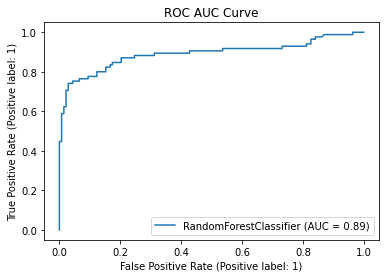

In [94]:
# Plotting ROC curve

from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [95]:
import joblib


joblib.dump(GCV.best_estimator_,"Titanic_project")

['Titanic_project']